## MODELOS DE SERIES DE TIMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer la data de Demanda en sector eléctrico

In [2]:
demanda_electrico_xls = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_xls

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


Vamos a graficar los datos de demanda eléctrico desde 2005 hasta 2022

In [4]:
demanda_electrico_xls_demanded_gas = demanda_electrico_xls['Demanded_Gas']
demanda_electrico_xls_demanded_gas

0      1819.58
1      1895.33
2      1765.86
3      1642.70
4      1895.54
        ...   
208    3350.03
209    3498.70
210    3350.97
211    3506.42
212    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

Text(0, 0.5, 'Demanda [MMpcd]')

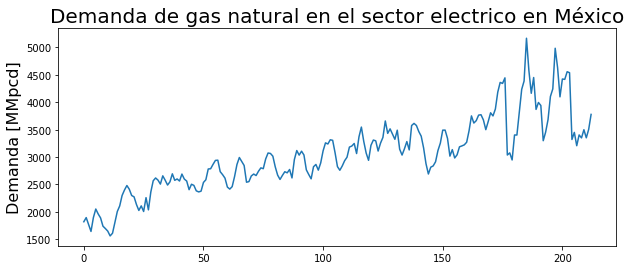

In [5]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_xls_demanded_gas)
plt.title('Demanda de gas natural en el sector electrico en México', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se elaboran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México

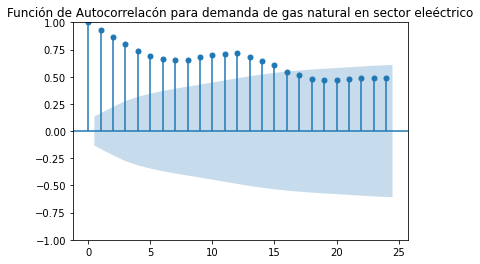

In [6]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_xls_demanded_gas.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico")

# Show the plot
plt.show()

c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


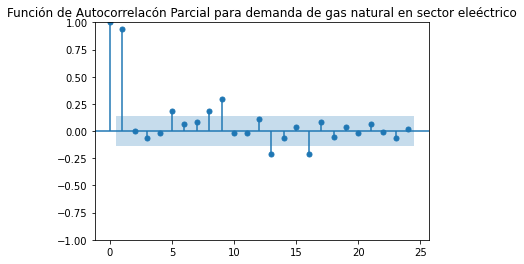

In [7]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_xls_demanded_gas.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [8]:
demanda_electrico_xls_demanded_gas_diff1 = demanda_electrico_xls_demanded_gas.diff()
demanda_electrico_xls_demanded_gas_diff1

0         NaN
1       75.75
2     -129.47
3     -123.16
4      252.84
        ...  
208    -53.41
209    148.67
210   -147.73
211    155.45
212    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

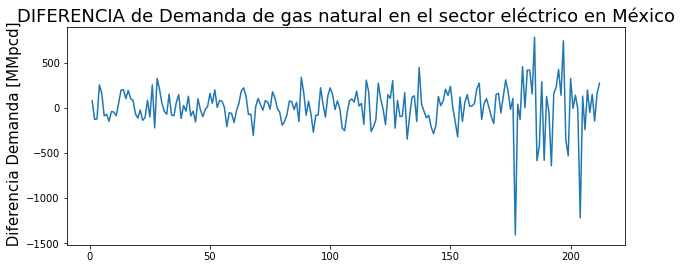

In [9]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_xls_demanded_gas_diff1)
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México', fontsize=18)
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

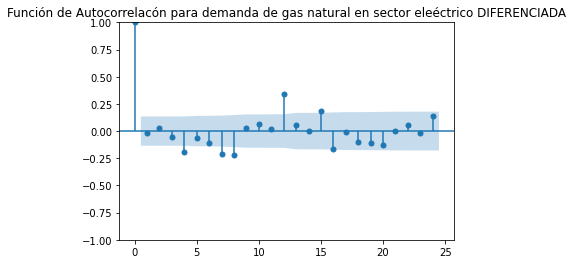

In [10]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_xls_demanded_gas_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

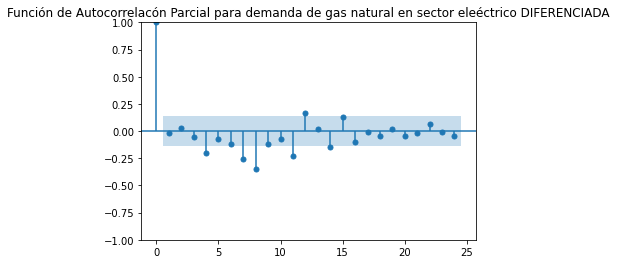

In [11]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_xls_demanded_gas_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [12]:
demanda_electrico_xls.set_index('Date', inplace=True)

In [13]:
## Get training and testing sets 
demanda_electrico_train_end = datetime(2021,9,1)
demanda_electrico_test_end = datetime(2022,9,1)
##This means we are taking from 2005 to 2018 as traning data to predict 2019 and 2020

demanda_electrico_train_data = demanda_electrico_xls[:demanda_electrico_train_end]
demanda_electrico_test_data = demanda_electrico_xls[demanda_electrico_train_end+ timedelta(days=1):demanda_electrico_test_end]
demanda_electrico_test_data


,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


### Proceso de AJUSTE de datos para mejora de modelos ARIMA 

In [14]:
import pandas as pd
import numpy as np

# Load time series data into Pandas DataFrame
df_demanda_electrico_train_data = pd.DataFrame(demanda_electrico_train_data) 
df_demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


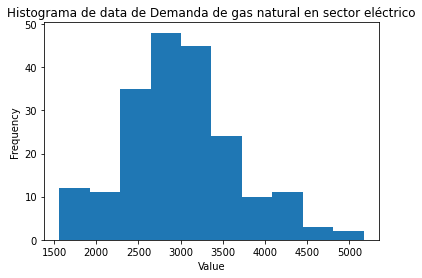

In [15]:
# Generate the histogram
plt.hist(df_demanda_electrico_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico')

# Display the plot
plt.show()

In [18]:
import pandas as pd

def remove_replace_outliers(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - 1.3 * IQR)) | (data > (Q3 + 1.3 * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data



In [19]:
column_name = 'Demanded_Gas'  # Replace with your actual column name
demanda_electrico_train_data[column_name] = remove_replace_outliers(demanda_electrico_train_data[column_name])


C:\Users\llell\AppData\Local\Temp\ipykernel_32220\612675990.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[outliers_mask] = historical_mean
C:\Users\llell\AppData\Local\Temp\ipykernel_32220\2306509058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demanda_electrico_train_data[column_name] = remove_replace_outliers(demanda_electrico_train_data[column_name])


In [20]:
demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.580000
2005-02-01,1895.330000
2005-03-01,1765.860000
2005-04-01,1642.700000
2005-05-01,1895.540000
...,...
2021-05-01,4243.930000
2021-06-01,2938.417969
2021-07-01,2938.417969


In [21]:

##Create the model
model_ARIMA_electrico = ARIMA (demanda_electrico_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_fit = model_ARIMA_electrico.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_fit.summary())


c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ll

Model fitting time 0.5481588840484619
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1406.998
Date:                Tue, 05 Sep 2023   AIC                           2831.995
Time:                        19:51:56   BIC                           2861.680
Sample:                    01-01-2005   HQIC                          2844.008
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2314      0.084     -2.739      0.006      -0.397      -0.066
ar.L2         -0.3498      0.063     -5.523      0.000      -0.474      -0.226
ar.L3         

c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
demanda_electrico_test_data

,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


In [23]:

# Get prediction start and end dates
pred_model_ARIMA_electrico_start_date = demanda_electrico_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_test_data.index[-1]


In [24]:
pred_model_ARIMA_electrico_end_date

Timestamp('2022-09-01 00:00:00')

In [25]:
# Get the predictors and residuals
predictions_model_ARIMA_electrico = model_ARIMA_electrico_fit.predict(
    start=pred_model_ARIMA_electrico_start_date,
    end=pred_model_ARIMA_electrico_end_date,
    typ='levels'  # You can specify the type of prediction you want
)

predictions_model_ARIMA_electrico

2021-10-01    2996.071321
2021-11-01    3203.322603
2021-12-01    3712.123998
2022-01-01    3464.980177
2022-02-01    3259.192607
2022-03-01    3218.966304
2022-04-01    3703.654850
2022-05-01    3590.667005
2022-06-01    3361.992462
2022-07-01    3164.104828
2022-08-01    3606.131810
2022-09-01    3641.039215
Freq: MS, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Demanda [MMpcd]')

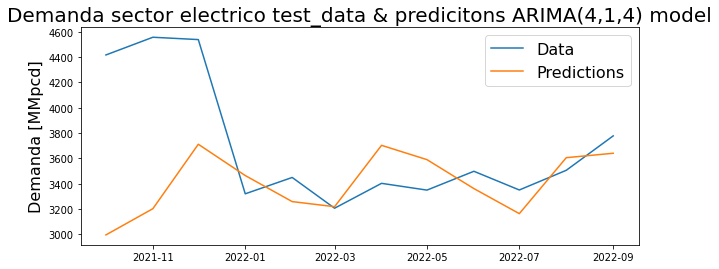

In [26]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_test_data)
plt.plot(predictions_model_ARIMA_electrico)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)